In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.image import NonUniformImage

import os

import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo

# Directory Names

In [4]:
current_path = os.getcwd()
splt_path = current_path.split("/")
top_path_idx = splt_path.index('DetectorDesignSensitivities')
top_directory = "/".join(splt_path[0:top_path_idx+1])
load_directory = top_directory + '/LoadFiles/InstrumentFiles/'

lisa_filedirectory = load_directory + 'LISA_ESA/SNRFiles/'
et_filedirectory = load_directory + 'EinsteinTelescope/SNRFiles/'
aLIGO_filedirectory = load_directory + 'aLIGO/SNRFiles/'
nanograv_filedirectory = load_directory + 'NANOGrav/SNRFiles/'
SKA_filedirectory = load_directory + 'SKA/SNRFiles/'

# Load Data Files

#### ESA LISA 

In [5]:
lisa_SNR_filename = 'LISA_ESA_SNR_Matrix_1.dat'
lisa_Samples_filename = 'LISA_ESA_Samples_1.dat'
lisa_SNR_filelocation = lisa_filedirectory+lisa_SNR_filename
lisa_Samples_filelocation = lisa_filedirectory+lisa_Samples_filename

#load SNR from file
lisa_SNR = np.loadtxt(lisa_SNR_filelocation)

#z and M sample space corresponding to SNR height
#First column is x-axis variable, second is y-axis variable
lisa_Samples = np.loadtxt(lisa_Samples_filelocation)

#Take log of variables and SNR for plotting
lisa_logSamples = np.log10(lisa_Samples)
lisa_logSNR = np.log10(lisa_SNR)

#### Einstein Telescope

In [6]:
et_SNR_filename = 'ET_SNR_Matrix_1.dat'
et_Samples_filename = 'ET_Samples_1.dat'
et_SNR_filelocation = et_filedirectory+et_SNR_filename
et_Samples_filelocation = et_filedirectory+et_Samples_filename
et_SNR = np.loadtxt(et_SNR_filelocation)
et_Samples = np.loadtxt(et_Samples_filelocation)
et_logSamples = np.log10(et_Samples)
et_logSNR = np.log10(et_SNR)

#### aLIGO

In [7]:
aLIGO_SNR_filename = 'aLIGO_SNR_Matrix_1.dat'
aLIGO_Samples_filename = 'aLIGO_Samples_1.dat'
aLIGO_SNR_filelocation = aLIGO_filedirectory+aLIGO_SNR_filename
aLIGO_Samples_filelocation = aLIGO_filedirectory+aLIGO_Samples_filename
aLIGO_SNR = np.loadtxt(aLIGO_SNR_filelocation)
aLIGO_Samples = np.loadtxt(aLIGO_Samples_filelocation)
aLIGO_logSNR = np.log10(aLIGO_SNR)
aLIGO_logSamples = np.log10(aLIGO_Samples)

#### NANOGrav

In [8]:
nanograv_SNR_filename = 'NANOGrav_SNR_Matrix_1.dat'
nanograv_Samples_filename = 'NANOGrav_Samples_1.dat'
nanograv_SNR_filelocation = nanograv_filedirectory+nanograv_SNR_filename
nanograv_Samples_filelocation = nanograv_filedirectory+nanograv_Samples_filename
nanograv_SNR = np.loadtxt(nanograv_SNR_filelocation)
nanograv_Samples = np.loadtxt(nanograv_Samples_filelocation)
nanograv_logSamples = np.log10(nanograv_Samples)
nanograv_logSNR = np.log10(nanograv_SNR)

#### SKA

In [9]:
SKA_SNR_filename = 'SKA_SNR_Matrix_1.dat'
SKA_Samples_filename = 'SKA_Samples_1.dat'
SKA_SNR_filelocation = SKA_filedirectory+SKA_SNR_filename
SKA_Samples_filelocation = SKA_filedirectory+SKA_Samples_filename
SKA_SNR = np.loadtxt(SKA_SNR_filelocation)
SKA_Samples = np.loadtxt(SKA_Samples_filelocation)
SKA_logSamples = np.log10(SKA_Samples)
SKA_logSNR = np.log10(SKA_SNR)

# Make Waterfall Plots

In [54]:
#Selects contour levels to separate sections into
contLevels = np.array([10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
logLevels = np.log10(contLevels)

contourcolorPresent = 'plasma'
transparencyPresent = 1.0
contourcolorFuture = 'plasma'
transparencyFuture = 0.6
axissize = 12
labelsize = 16
textsize = 14
textcolor1 = 'k'
textcolor2 = 'w'
linesize = 4
figsize=(10,6)

In [11]:
###########################
#Set pretty labels
Mlabel_min = 0
Mlabel_max = 11
zlabel_min = -2.0
zlabel_max = 3.0
zlabels = np.logspace(zlabel_min,zlabel_max,zlabel_max-zlabel_min+1)
Mlabels = range(Mlabel_min,Mlabel_max+1,1)

ages1 = np.array([13,10,5,1])*u.Gyr 
ages2 = np.array([500,100,10,1])*u.Myr
ages2 = ages2.to('Gyr')
ages = np.hstack((ages1.value,ages2.value))
ages = ages*u.Gyr
ageticks = [z_at_value(cosmo.age,age) for age in ages]

In [58]:
#########################
#Label positions for different GW detectors
#########################
#Label different GW detectors
labelaLIGO_text = 'aLIGO\n(2016)'
labelaLIGO_xpos = 0.22
labelaLIGO_ypos = 0.125

labelnanograv_text = 'NANOGrav\n(2018)'
labelnanograv_xpos = 0.93
labelnanograv_ypos = 0.15

labelet_text = 'ET\n(~2030s)'
labelet_xpos = 0.175
labelet_ypos = 0.5
#labelet_xpos = 0.1
#labelet_ypos = 0.75

labelLisa_text = 'LISA\n(~2030s)'
labelLisa_xpos = 0.6
labelLisa_ypos = 0.1

labelIpta_text = 'IPTA\n(~2030s)'
labelIpta_xpos = 0.84
labelIpta_ypos = 0.85
#labelIpta_xpos = 0.775
#labelIpta_ypos = 0.75

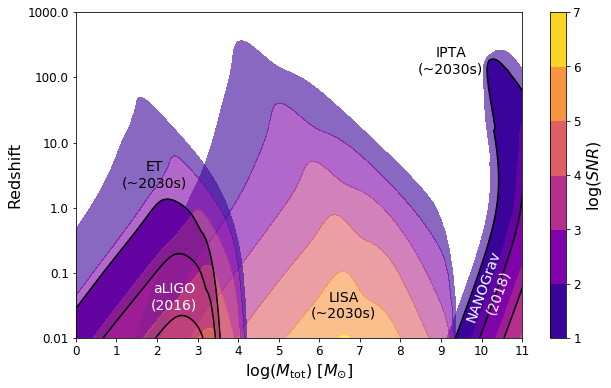

In [59]:
fig1, ax1 = plt.subplots(figsize=figsize)
#figsize=(10,5)
CS1 = ax1.contourf(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,\
                   cmap = contourcolorPresent, alpha = transparencyPresent)
ax1.contour(nanograv_logSamples[0],nanograv_logSamples[1],nanograv_logSNR,logLevels,colors = 'k')

ax1.contourf(aLIGO_logSamples[0],aLIGO_logSamples[1],aLIGO_logSNR,logLevels,\
             cmap = contourcolorPresent, alpha = transparencyPresent)
ax1.contour(aLIGO_logSamples[0],aLIGO_logSamples[1],aLIGO_logSNR,logLevels,colors = 'k')

ax1.contourf(SKA_logSamples[0],SKA_logSamples[1],SKA_logSNR,logLevels,\
             cmap = contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(lisa_logSamples[0],lisa_logSamples[1],lisa_logSNR,logLevels,\
             cmap=contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(et_logSamples[0],et_logSamples[1],et_logSNR,logLevels,\
             cmap = contourcolorFuture, alpha = transparencyFuture)

#########################
#Set axes limits 
ax1.set_xlim(et_logSamples[0][0],11)
ax1.set_ylim(SKA_logSamples[1][0],SKA_logSamples[1][-1])

#########################
#Set ticks and labels
ax1.set_yticks(np.log10(zlabels))
ax1.set_yticklabels(zlabels,fontsize = axissize)
ax1.set_xticks(Mlabels)
ax1.set_xticklabels(Mlabels,fontsize = axissize)

ax1.set_xlabel(r'${\rm log}(M_{\rm tot})$ $[M_{\odot}]$',fontsize = labelsize)
ax1.set_ylabel('Redshift',fontsize = labelsize)
ax1.yaxis.set_label_coords(-.12,.5)

'''
###########################
#Set other side y-axis
ax2 = ax1.twinx()
ax2.set_yticks(np.log10(ageticks))
ax2.set_yticklabels(['{:g}'.format(age) for age in ages.value],fontsize = axissize)
ax2.set_ylabel(r'$t_{\rm cosmic}$ [Gyr]',fontsize=labelsize)
'''

#########################
#Label different GW detectors
plt.text(labelaLIGO_xpos,labelaLIGO_ypos,labelaLIGO_text,fontsize = textsize, \
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes)

plt.text(labelnanograv_xpos,labelnanograv_ypos,labelnanograv_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes,\
        rotation=70)

plt.text(labelet_xpos,labelet_ypos,labelet_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelLisa_xpos,labelLisa_ypos,labelLisa_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelIpta_xpos,labelIpta_ypos,labelIpta_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

#########################
#Make colorbar
#cbar1 = fig1.colorbar(CS1,ax=(ax1,ax2))
cbar1 = fig1.colorbar(CS1)
cbar1.set_label(r'${\rm log}(SNR)$',fontsize = labelsize)
cbar1.ax.tick_params(labelsize = axissize)
plt.show()

In [62]:
#Save Figure Name
fig_filedirectory = current_path
figname = '/WaterfallPlots_v1.png'
#########################
#Save Figure to File
isitsavetime = False
figloc = fig_filedirectory+figname
if isitsavetime:
    fig1.savefig(figloc,bbox_inches='tight')